RECONEIXENT CARÀCTERS

In [3]:
import pandas as pd

df = pd.read_csv('Training.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [13]:
df.nunique()

0      10
1       1
2       1
3       1
4       1
       ..
780     3
781     1
782     1
783     1
784     1
Length: 785, dtype: int64

In [8]:
df.duplicated().sum()

0

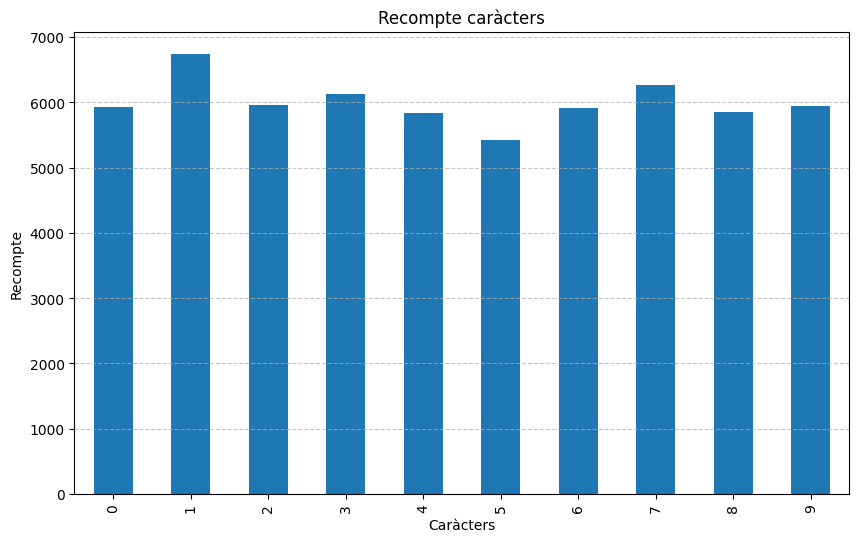

In [5]:
import matplotlib.pyplot as plt

# Calcular el recompte dels caràcters de la priemra columna (etiquetes)
counts = df[0].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Recompte caràcters')
plt.xlabel('Caràcters')
plt.ylabel('Recompte')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Models
train test 80/20

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(df.columns[0], axis=1)
y = df[df.columns[0]]  #etiques

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

print(X_train)

       1    2    3    4    5    6    7    8    9    10   ...  775  776  777   
38537    0    0    0    0    0    0    0    0    0    0  ...    0    0    0  \
7099     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
22802    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
22966    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
50049    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
53681    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59648    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
56361    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
49392    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
42166    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
38537   

In [17]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
y_pred

array([0, 7, 9, ..., 4, 5, 3], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Suponiendo que y_test son las etiquetas reales y y_pred son las predicciones
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Matriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", classification_rep)
print("\nExactitud (Accuracy):", accuracy)

Matriz de confusión:
 [[576   0   6   0   3   1   3   1  13   0]
 [  0 611  10   3   2   1   6   1  13   0]
 [  8   7 561   4   5   1   4   8  11   0]
 [  3   7  33 541   0  30   1  15   6   3]
 [  5   0   1   0 526   3  15   5   4  30]
 [  6   2   1  19   4 434   9   0  11   2]
 [  5   4   4   0   6   3 545   0   3   0]
 [  7   1   8   3   2   1   0 556   0  25]
 [ 10  20  14   9   5  12  11   1 572   5]
 [  7   1   0  10  17   3   0  24   8 523]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       603
           1       0.94      0.94      0.94       647
           2       0.88      0.92      0.90       609
           3       0.92      0.85      0.88       639
           4       0.92      0.89      0.91       589
           5       0.89      0.89      0.89       488
           6       0.92      0.96      0.94       570
           7       0.91      0.92      0.92       603
           8       0.89      0.8